In [27]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_db = pd.read_csv(city_data_to_load)
ride_db = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merge_db = pd.merge(city_db, ride_db, how='left', on=['city'])
# Display the data table for preview
merge_db

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


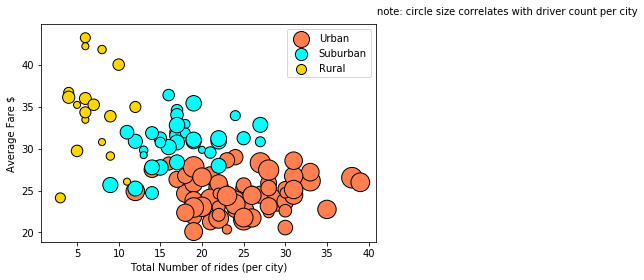

In [131]:
dfurban = merge_db[merge_db['type'] == 'Urban']
dfsuburban = merge_db[merge_db['type'] == 'Suburban']
dfrural = merge_db[merge_db['type'] == 'Rural']

U_Av_fare = dfurban.groupby(['city'])['fare'].mean() 
U_Total_rides = dfurban.groupby(['city'])['ride_id'].count()
U_Drivers = dfurban.drop_duplicates(['city']).set_index(['city'])['driver_count']

S_Av_fare = dfsuburban.groupby(['city'])['fare'].mean() 
S_Total_rides = dfsuburban.groupby(['city'])['ride_id'].count()
S_Drivers = dfsuburban.drop_duplicates(['city']).set_index(['city'])['driver_count']

R_Av_fare = dfrural.groupby(['city'])['fare'].mean() 
R_Total_rides = dfrural.groupby(['city'])['ride_id'].count()
R_Drivers = dfrural.drop_duplicates(['city']).set_index(['city'])['driver_count']

Colors = {"Urban": "coral",
           "Rural": "gold",
           "Suburban": "cyan"}
#Build the scatter plots for each city types
plt.scatter(U_Total_rides, U_Av_fare, s=(U_Drivers**(.5)*50), c="Coral", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors="black", hold=None, data=merge_db)
plt.scatter(S_Total_rides, S_Av_fare, s=(S_Drivers**(.5)*50), c="Cyan", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors="black", hold=None, data=merge_db)
plt.scatter(R_Total_rides, R_Av_fare, s=(R_Drivers**(.5)*50), c="Gold", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors="black", hold=None, data=merge_db)
plt.legend(['Urban', 'Suburban', 'Rural'])
plt.xlabel('Total Number of rides (per city)')
plt.ylabel('Average Fare $')

plt.text(41, 46, r'note: circle size correlates with driver count per city')
plt.savefig('bubbleplot.png')


## Bubble Plot of Ride Sharing Data

# Obtain the x and y coordinates for each of the three city types

dfurban = merge_db[merge_db['type'] == 'Urban']
dfsuburban = merge_db[merge_db['type'] == 'Suburban']
dfrural = merge_db[merge_db['type'] == 'Rural']

U_Av_fare = dfurban.groupby(['city'])['fare'].mean() 
U_Total_rides = dfurban.groupby(['city'])['ride_id'].count()
U_Drivers = dfurban.drop_duplicates(['city']).set_index(['city'])['driver_count']

S_Av_fare = dfsuburban.groupby(['city'])['fare'].mean() 
S_Total_rides = dfsuburban.groupby(['city'])['ride_id'].count()
S_Drivers = dfsuburban.drop_duplicates(['city']).set_index(['city'])['driver_count']

R_Av_fare = dfrural.groupby(['city'])['fare'].mean() 
R_Total_rides = dfrural.groupby(['city'])['ride_id'].count()
R_Drivers = dfrural.drop_duplicates(['city']).set_index(['city'])['driver_count']

Colors = {"Urban": "coral",
           "Rural": "gold",
           "Suburban": "cyan"}
#Build the scatter plots for each city types
plt.scatter(U_Total_rides, U_Av_fare, s=U_Drivers**(.5), c="Coral", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors="black", hold=None, data=merge_db)
plt.scatter(S_Total_rides, S_Av_fare, s=S_Drivers**(.5), c="Cyan", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors="black", hold=None, data=merge_db)
plt.scatter(R_Total_rides, R_Av_fare, s=R_Drivers**(.5), c="Gold", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors="black", hold=None, data=merge_db)
# Incorporate the other graph properties

# Create a legend
# Incorporate a text label regarding circle size

# Save Figure


In [133]:
# Show plot
plt.show()

## Total Fares by City Type

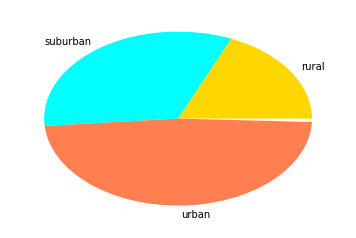

In [158]:
# Calculate Type Percents
ftotal = merge_db.drop_duplicates(['city'])['fare'].sum()
frural = R_Av_fare.sum()/total
fsuburban = S_Av_fare.sum()/total
furban= U_Av_fare.sum()/total
fpiesize = [frural, fsuburban, furban]
flabels= ['rural', 'suburban', 'urban']
fcolors= ['gold', 'cyan', 'coral']
# Build Pie Chart
plt.pie(fpiesize,labels=flabels, colors = fcolors)
# Save Figure
plt.savefig('piefare.png')


In [151]:
# Show Figure
plt.show()

## Total Rides by City Type

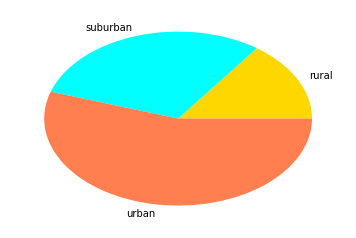

In [152]:

# Calculate Type Percents
total = len(merge_db.drop_duplicates(['city']))
rural = len(R_Total_rides)/total
suburban = len(S_Total_rides)/total
urban = len(U_Total_rides)/total
piesize = [rural, suburban, urban]
labels= ['rural', 'suburban', 'urban']
colors= ['gold', 'cyan', 'coral']
# Build Pie Chart
plt.pie(piesize,labels=labels, colors = colors)
# Save Figure
plt.savefig('pietotal.png')


In [153]:
# Show Figure
plt.show()

## Total Drivers by City Type

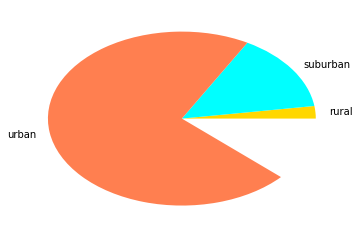

In [160]:
# Calculate Driver Percents
dtotal = merge_db.drop_duplicates(['city'])['driver_count'].sum()
drural = R_Drivers.sum()/total
dsuburban = S_Drivers.sum()/total
durban= U_Drivers.sum()/total
dpiesize = [drural, dsuburban, durban]
dlabels= ['rural', 'suburban', 'urban']
dcolors= ['gold', 'cyan', 'coral']
# Build Pie Chart
plt.pie(dpiesize,labels=dlabels, colors = dcolors)
# Save Figure
plt.savefig('piefare.png')

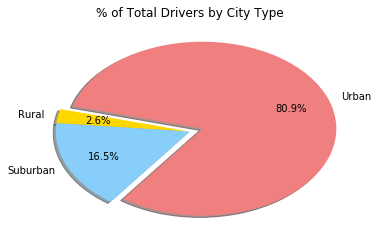

In [6]:
# Show Figure
plt.show()